In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sts
import seaborn as sns

data = pd.read_csv("netflix_movies_dataset.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data.shape

(8807, 12)

In [8]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
data['date_added']=data['date_added'].fillna(method='ffill')

In [10]:
data1=data.fillna("Not specified")
data1.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
data1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not specified,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not specified,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not specified,Not specified,Not specified,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Здесь мы видим какой контент доступный в разных странах.

In [12]:
data1.country

0       United States
1        South Africa
2       Not specified
3       Not specified
4               India
            ...      
8802    United States
8803    Not specified
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [13]:
data1.country=data1.country.apply(lambda x: x.strip())
country_stats=data1['country'].value_counts(ascending=True)
country_stats

Chile, Argentina                 1
Canada, Japan, Netherlands       1
United States, Hungary           1
France, Germany                  1
France, Qatar                    1
                              ... 
Japan                          245
United Kingdom                 419
Not specified                  831
India                          972
United States                 2818
Name: country, Length: 749, dtype: int64

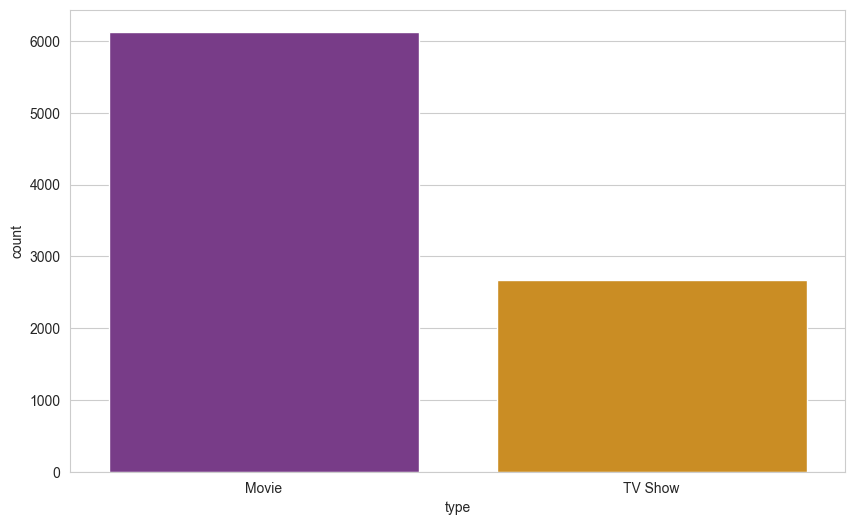

In [17]:
plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid")
sns.countplot(data=data1,x="type",palette='CMRmap')
plt.show()

Здесь выведены диаграммы, что фильмы популярны, чем тв шоу

Проверяем популярность контента по странам

Text(0.5, 1.0, 'CONTENT AVAILABLE IN DIFFERENT COUNTRIES')

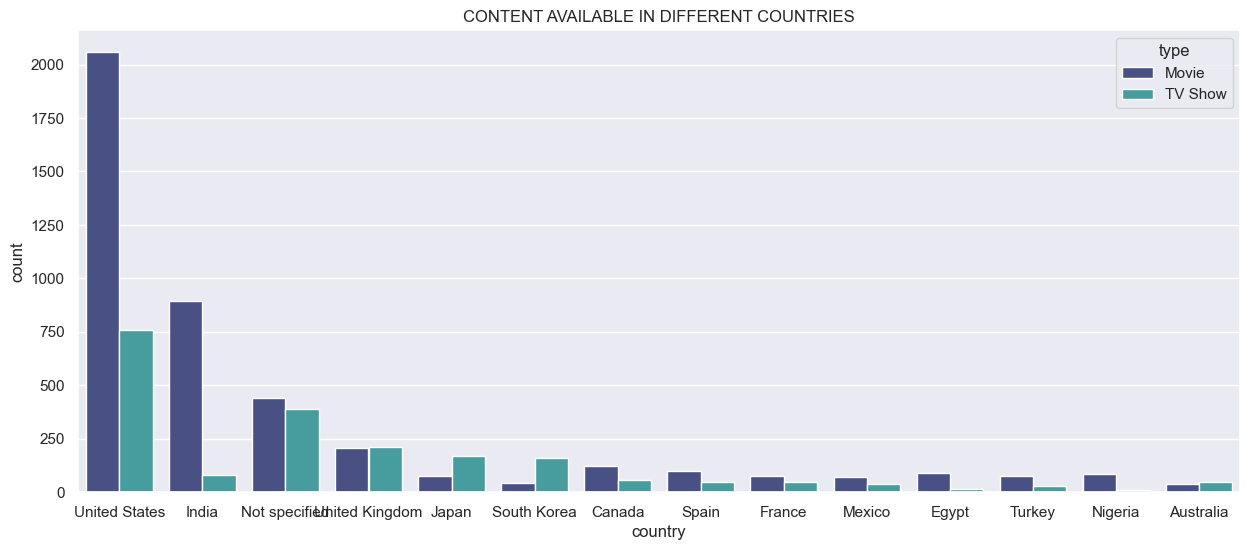

In [18]:
plt.figure(figsize=(15,6))
sns.set(style='darkgrid')
sns.countplot(data=data1,x=data1["country"],hue=data1['type'],palette='mako',order=data1['country'].value_counts().index[0:14])
plt.title('CONTENT AVAILABLE IN DIFFERENT COUNTRIES')

Проверяем какая страна имеет больше фильмов и тв шоу

Text(0.5, 1.0, 'Movies and Tv shows in a Country')

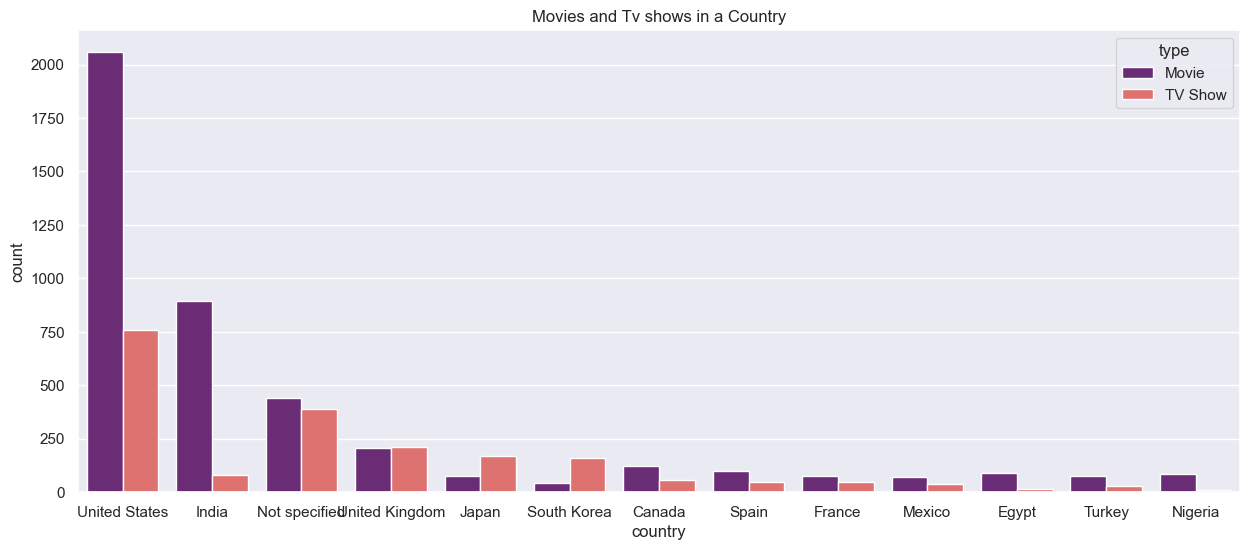

In [19]:
plt.figure(figsize=(15,6))
sns.set(style='darkgrid')
sns.countplot(data=data1,x=data1['country'],hue=data1['type'],palette='magma',order=data1['country'].value_counts().index[0:13])
plt.title("Movies and Tv shows in a Country")

И наконец рейтинг

In [20]:
data1['rating'].value_counts()

TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 80
G                  41
TV-Y7-FV            6
Not specified       4
NC-17               3
UR                  3
74 min              1
84 min              1
66 min              1
Name: rating, dtype: int64

Text(0.5, 1.0, 'RATING')

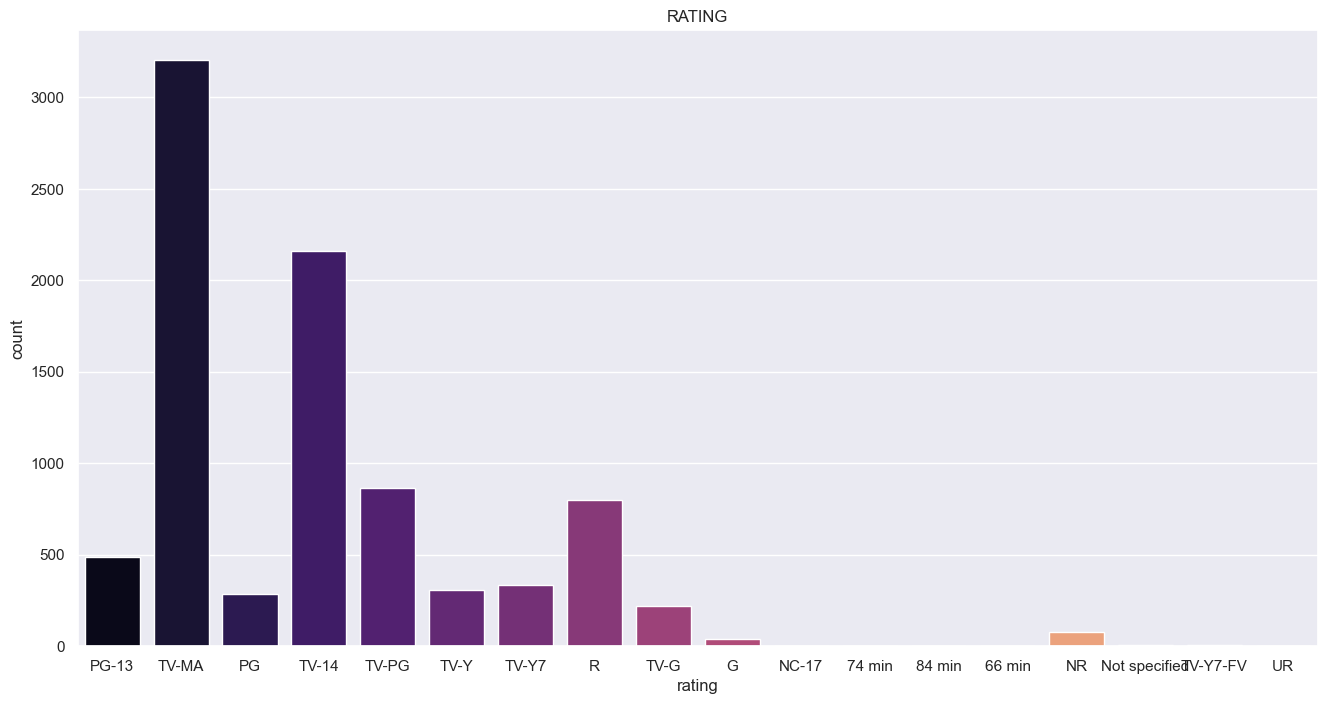

In [21]:
plt.figure(figsize=(16,8))
sns.countplot(x=data1['rating'],data=data1,palette='magma')
plt.title("RATING")

 Посмотрим на рейтинг основываясь на жанре

<AxesSubplot: xlabel='rating', ylabel='count'>

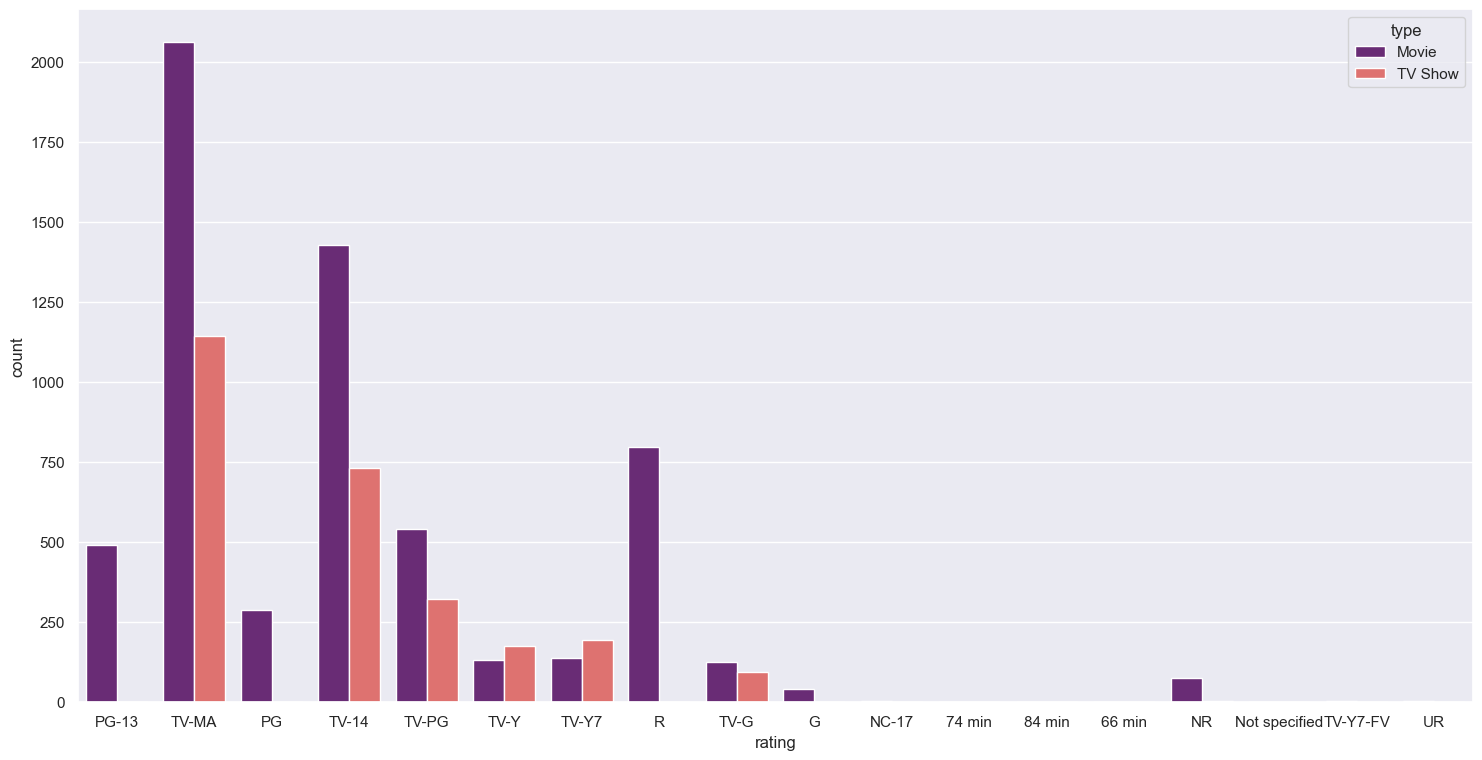

In [22]:
plt.figure(figsize=(18,9))
sns.countplot(data=data1,x='rating',hue='type',palette='magma')